# Unit 9. 신경망 모델
### - 이진 분류 - 유방암 예측 사례

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

- 모델 정의

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [8]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 35ms/step - loss: 77.2897 - accuracy: 0.6209 - val_loss: 3.2743 - val_accuracy: 0.2198
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 15.9171 - accuracy: 0.3654 - val_loss: 19.2634 - val_accuracy: 0.3516
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 9.7101 - accuracy: 0.4396 - val_loss: 8.9285 - val_accuracy: 0.6593
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 5.1071 - accuracy: 0.5604 - val_loss: 4.3382 - val_accuracy: 0.3516
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4100 - accuracy: 0.6016 - val_loss: 0.8553 - val_accuracy: 0.8242
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.8057 - accuracy: 0.7005 - val_loss: 0.4781 - val_accuracy: 0.8901
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6284 - accuracy: 0.8516 - val_loss: 0.4544 - val_accuracy: 0.8132
Epoch 8/100
8/8 [======

- 모델 평가

In [9]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.9035


[0.4249313175678253, 0.9035087823867798]

- 훈련과정 시각화

In [10]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1,len(y_acc)+1)        # epoch

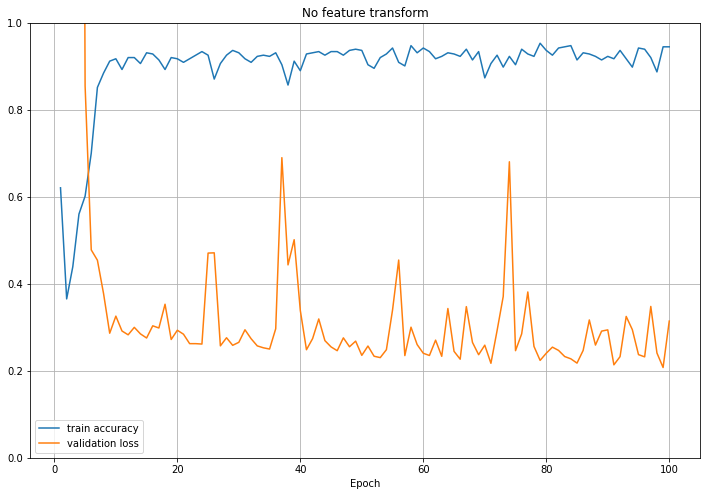

In [11]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

- 데이터 스케일링

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

In [13]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [14]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                      epochs=100, batch_size=50)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.6199 - accuracy: 0.6951 - val_loss: 0.4986 - val_accuracy: 0.9341
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.9423 - val_loss: 0.3579 - val_accuracy: 0.9451
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.3065 - accuracy: 0.9478 - val_loss: 0.2651 - val_accuracy: 0.9341
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2276 - accuracy: 0.9560 - val_loss: 0.2098 - val_accuracy: 0.9451
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1767 - accuracy: 0.9615 - val_loss: 0.1766 - val_accuracy: 0.9451
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.1440 - accuracy: 0.9698 - val_loss: 0.1564 - val_accuracy: 0.9341
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1221 - accuracy: 0.9780 - val_loss: 0.1432 - val_accuracy: 0.9451
Epoch 8/100
8/8 [=========

In [17]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0854 - accuracy: 0.9737


[0.08540082722902298, 0.9736841917037964]

In [18]:
y_acc2 = history2.history['accuracy']
y_vloss2 = history2.history['val_loss']
xs2 = np.arange(1,len(y_acc2)+1)        # epoch

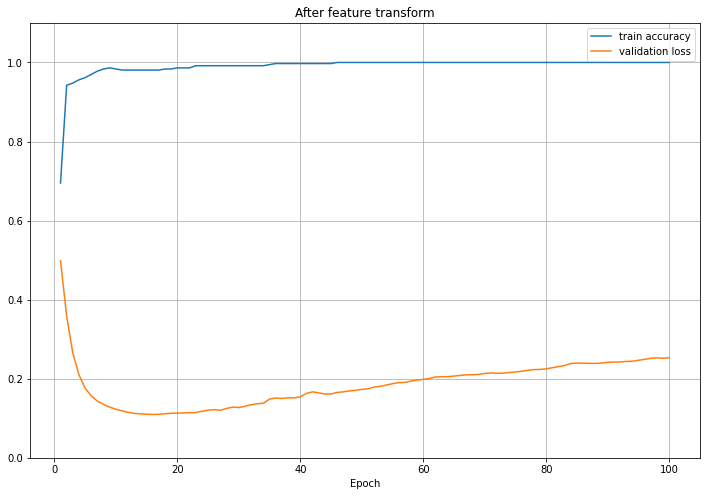

In [19]:
plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train accuracy')
plt.plot(xs2, y_vloss2, label='validation loss')
plt.legend()
plt.grid()
plt.ylim([0,1.1])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()